Parâmetros iniciais e paths.

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Dados 
width = 140
height = 100
new_size = (width, height)  

red = random.randint(50,100)
green = random.randint(50,100)
blue = random.randint(50,100)
multiply_value = random.randint(0,9)/10 + random.randint(1,2)
divide_value = random.randint(0,9)/10 + 2

image1_path = 'img/liberdade.jpg'
image2_path = 'img/cristo.jpg'

Ler, redimensionar e normalizar as fotos.

In [27]:
img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

if img1 is None or img2 is None:
    print(f"Erro ao ler a imagem")
else:
    img1 = cv2.resize(img1, new_size)
    img2 = cv2.resize(img2, new_size)
    cv2.normalize(img1,img1, 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(img2,img2, 0, 255, cv2.NORM_MINMAX)


Calcular e normalizar imagens separadamente.

In [28]:
def process_and_display_images(img):
    img_add = img.copy()
    img_add[:, :, 0] = cv2.add(img[:, :, 0], blue)   # Canal azul
    img_add[:, :, 1] = cv2.add(img[:, :, 1], green)  # Canal verde
    img_add[:, :, 2] = cv2.add(img[:, :, 2], red)    # Canal vermelho
    img_add = cv2.normalize(img_add, None, 0, 255, cv2.NORM_MINMAX)
    
    img_subtract = img.copy()
    img_subtract[:, :, 0] = cv2.subtract(img[:, :, 0], blue)   # Canal azul
    img_subtract[:, :, 1] = cv2.subtract(img[:, :, 1], green)  # Canal verde
    img_subtract[:, :, 2] = cv2.subtract(img[:, :, 2], red)    # Canal vermelho
    img_subtract = cv2.normalize(img_subtract, None, 0, 255, cv2.NORM_MINMAX)
    
    img_multiply = img.copy()
    img_multiply[:, :, 0] = cv2.multiply(img[:, :, 0], multiply_value)   # Canal azul
    img_multiply[:, :, 1] = cv2.multiply(img[:, :, 1], multiply_value)  # Canal verde
    img_multiply[:, :, 2] = cv2.multiply(img[:, :, 2], multiply_value)    # Canal vermelho
    img_multiply = cv2.normalize(img_multiply, None, 0, 255, cv2.NORM_MINMAX)
    
    img_divide = img.copy()
    img_divide[:, :, 0] = cv2.divide(img[:, :, 0], divide_value)   # Canal azul
    img_divide[:, :, 1] = cv2.divide(img[:, :, 1], divide_value)  # Canal verde
    img_divide[:, :, 2] = cv2.divide(img[:, :, 2], divide_value)    # Canal vermelho
    # img_divide = cv2.normalize(img_divide, None, 0, 255, cv2.NORM_MINMAX)
    
    images = [img_add, img_subtract, img_multiply, img_divide]
    titles = [f'Addition R:{red}, G:{green}, B{blue}', f'Subtraction R:{red}, G:{green}, B{blue}', f'Multiplication {multiply_value}', f'Division {divide_value}']

    plt.figure(figsize=(12, 6))  

    # Usar subplots para exibir as imagens lado a lado
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i], fontsize=12)  # Título com tamanho de fonte ajustado
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Calcular e normalizar imagens juntas.

In [29]:
def merge_images():
    img_add= np.zeros(img1.shape, dtype=np.uint8)
    img_subtract= np.zeros(img1.shape, dtype=np.uint8)
    cv2.normalize(cv2.add(img1, img2), img_add, 0, 255, cv2.NORM_MINMAX)  
    cv2.normalize(cv2.subtract(img1, img2), img_subtract, 0, 255, cv2.NORM_MINMAX)  

    images = [img_add, img_subtract]
    titles = ['Addition', 'Subtraction']

    plt.figure(figsize=(12, 6))  

    # Usar subplots para exibir as imagens lado a lado
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i], fontsize=12)  # Título com tamanho de fonte ajustado
        plt.axis('off')

    plt.tight_layout()
    plt.show()

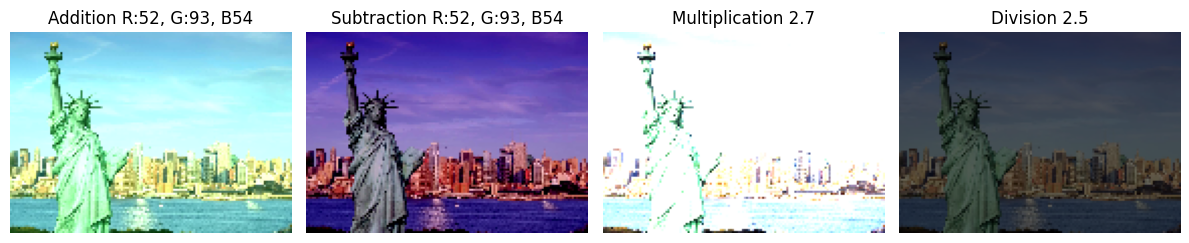

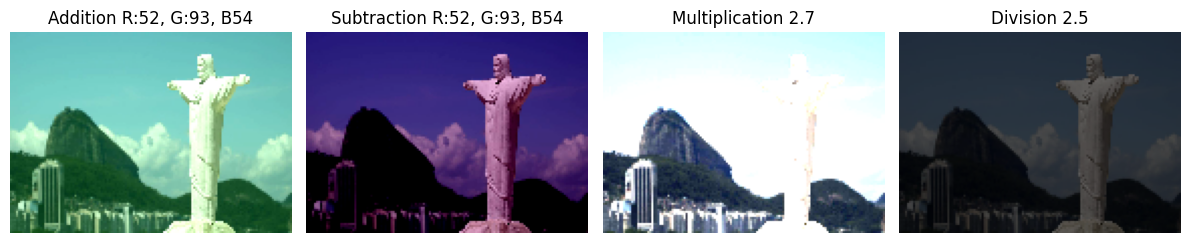

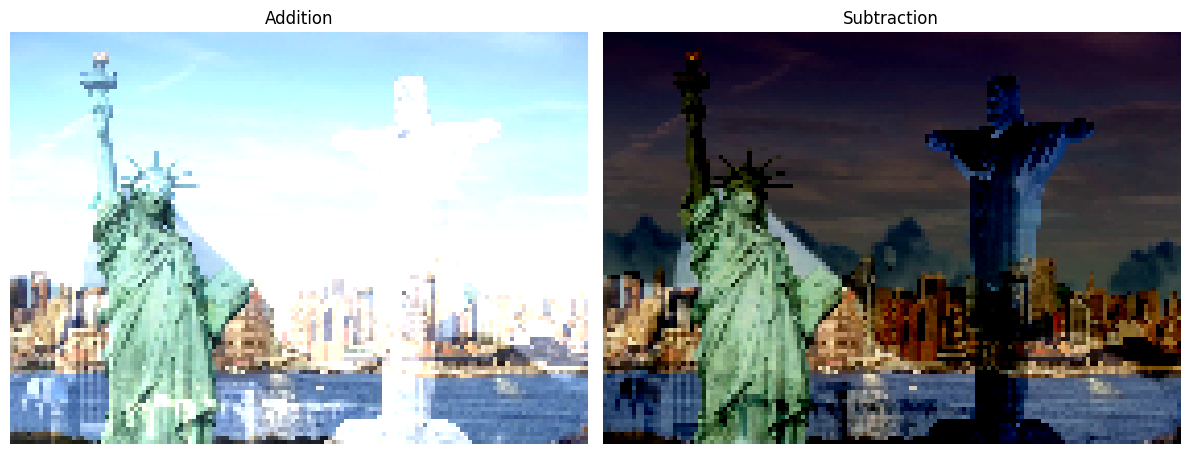

In [30]:
process_and_display_images(img1)
process_and_display_images(img2)
merge_images()

Vemos que adição e subtração dependem do quanto vai mudar em cada canal de cor, se forem 3 valores similares, não muda muito. se adicionar mais de uma cor, essa cor vai ser ressaltada. O mesmo ocorre na subtração, se for tirado mais vermelho e azul, a imagem fica mais verde.

Com a multiplicação e divisão, o foco é no brilho. A multiplicação aumenta o brilho e a divisão diminui.

Na junção das imagens, a soma leva a brilho maior e a subtração a escurecer a imagem, tendo algumas partes negativas.